In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/asish/machine-learning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
#trX =   (trX - np.min(trX)) / (np.max(trX) - np.min(trX))
#print(trX)

In [4]:
noise = np.random.randn(*trX.shape) * 0.33

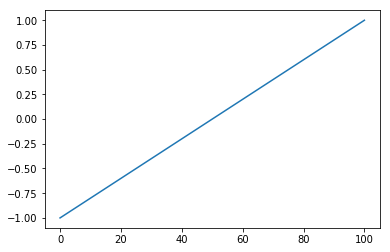

In [5]:
plt.plot(trX)

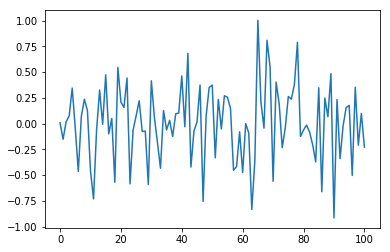

In [6]:
plt.plot(noise)

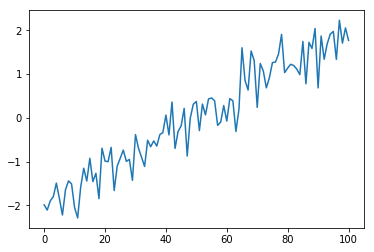

In [7]:
trY = 2 * trX + noise# create a y value which is approximately linear but with some random noise
plt.plot(trY)

In [8]:
noise


array([ 7.67161225e-03, -1.51701305e-01,  1.77964293e-02,  7.45616059e-02,
        3.45119727e-01, -4.52033449e-02, -4.64480206e-01,  7.13953377e-02,
        2.36566923e-01,  1.25984162e-01, -4.56629876e-01, -7.31408026e-01,
       -6.48782089e-02,  3.25917029e-01, -6.79590946e-03,  4.73335682e-01,
       -9.98774672e-02,  5.02400535e-02, -5.69548624e-01,  5.45317808e-01,
        2.09139033e-01,  1.56563949e-01,  4.43063551e-01, -5.85331167e-01,
       -6.33950738e-02,  7.56114593e-02,  2.21238360e-01, -7.64992862e-02,
       -7.22912032e-02, -5.91070955e-01,  4.15692827e-01,  6.07990848e-02,
       -1.83056565e-01, -4.33457801e-01,  1.26384967e-01, -6.13413991e-02,
        3.13747521e-02, -1.25575657e-01,  9.48155866e-02,  1.02779801e-01,
        4.63279397e-01, -3.11188735e-02,  6.81544929e-01, -4.21713025e-01,
       -7.17601567e-02,  1.57191560e-02,  3.74884951e-01, -7.55347019e-01,
        7.48140138e-02,  3.51378137e-01,  3.73493802e-01, -3.32371397e-01,
        2.35114865e-01, -

In [9]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform',activation='linear'))
model.compile(optimizer='sgd', loss='mse')

/home/asish/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, input_dim=1, kernel_initializer="uniform")`
  


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Print initial weights
weights = model.layers[0].get_weights()
print(weights)
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

[array([[-0.03987575]], dtype=float32), array([0.], dtype=float32)]
Linear regression model is initialized with weight w: -0.04, b: 0.00


In [12]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [13]:
model.fit(trX,trY,nb_epoch=100,verbose=1,callbacks=[tensorboard])

Epoch 1/100
101/101 [==============================] - 0s 174us/step - loss: 1.5325
Epoch 2/100
101/101 [==============================] - 0s 82us/step - loss: 1.4556
Epoch 3/100
 32/101 [========>.....................] - ETA: 0s - loss: 1.6015

/home/asish/machine-learning/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


101/101 [==============================] - 0s 107us/step - loss: 1.3872
Epoch 4/100
101/101 [==============================] - 0s 110us/step - loss: 1.3146
Epoch 5/100
101/101 [==============================] - 0s 117us/step - loss: 1.2546
Epoch 6/100
101/101 [==============================] - 0s 103us/step - loss: 1.1930
Epoch 7/100
101/101 [==============================] - 0s 91us/step - loss: 1.1230
Epoch 8/100
101/101 [==============================] - 0s 90us/step - loss: 1.0742
Epoch 9/100
101/101 [==============================] - 0s 76us/step - loss: 1.0319
Epoch 10/100
101/101 [==============================] - 0s 73us/step - loss: 0.9832
Epoch 11/100
101/101 [==============================] - 0s 65us/step - loss: 0.9286
Epoch 12/100
101/101 [==============================] - 0s 77us/step - loss: 0.8838
Epoch 13/100
101/101 [==============================] - 0s 87us/step - loss: 0.8487
Epoch 14/100
101/101 [==============================] - 0s 63us/step - loss: 0.8103
Epoch 1

101/101 [==============================] - 0s 76us/step - loss: 0.1383


In [26]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))


Linear regression model is trained with weight w: 1.87, b: 0.00


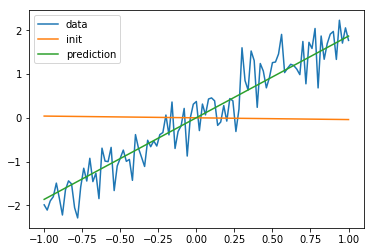

In [27]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

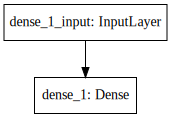

In [32]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [33]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes='True') # to save above 